<a href="https://colab.research.google.com/github/gsuelens/Programacao_Python/blob/main/Projeto_Mercado_Financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **ANALISE DE DADOS - MERCADO FINANCEIRO**
O objetivo deste projeto é realizar uma análise abrangente das tendências e padrões históricos dos preços das ações da Magazine Luiza. Utilizando Python e bibliotecas específicas de análise de dados, vamos explorar os dados históricos das ações da empresa, identificar insights relevantes e visualizar os resultados de forma clara e compreensível.



In [2]:
#01 - Importando as libs

#Libs para modelagem e Matrizes

import pandas as pd
import numpy as  np

#Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


#Lib para ingorar avisos

import warnings

#Desabilitando avisos
warnings.filterwarnings('ignore')

In [6]:
#02 - Lendo a base de dados

Base_Dados = pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')

#Verificando a base

Base_Dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [8]:
#Verificando a quantidade de registro na base

Base_Dados.shape

(247, 7)

In [11]:
#Verificando o tipo de dados da base

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [12]:
#Verificando o valores numericos da base

Base_Dados.describe()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


In [15]:
#Trocando a coluna 'data' de lugar
Dados = Base_Dados.set_index('Data')

Dados.head()


,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


Text(0, 0.5, 'Valor da Ação (R$)')

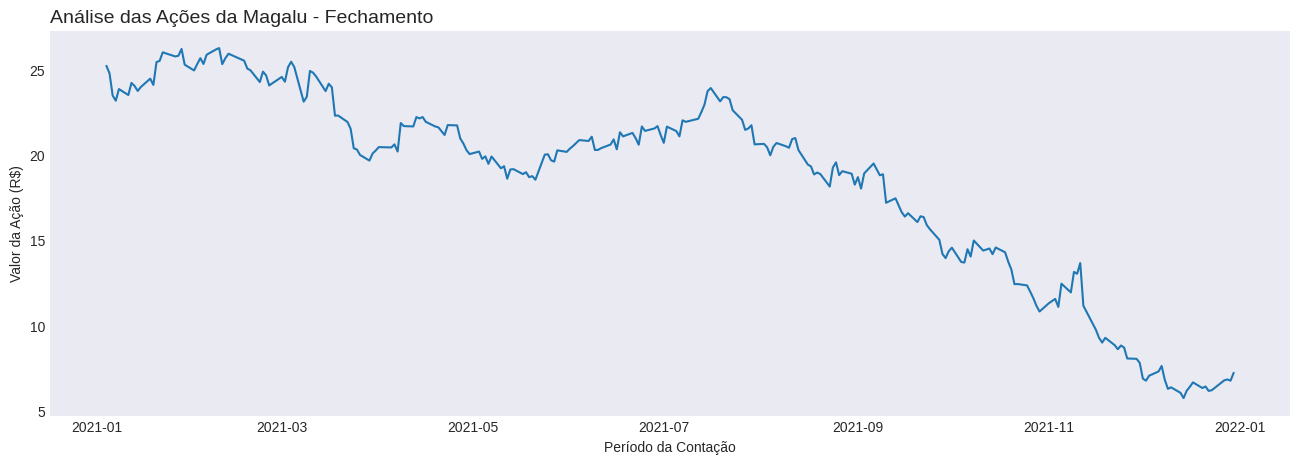

In [21]:
#Vizualização gráfica: Serie Temporal

plt.style.use('seaborn-dark')
plt.figure(figsize=(16,5))
plt.title('Análise das Ações da Magalu - Fechamento', fontsize=14, loc='left')
plt.plot(Dados.index, Dados['Fechamento'])
plt.xlabel('Período da Contação')
plt.ylabel('Valor da Ação (R$)')

### **Continua......**